تمرین شما تصحیح شد.
لطفا از این به بعد فایل نوتبوک رو در حالت ادیتور با هوسم شیر کنید

## Name: Roozbeh Boroomand poor

# Manual Seed




In [ ]:
seed = 42
torch.manual_seed(seed)

# imports


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset , DataLoader
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

import matplotlib
from matplotlib import pyplot as plt

import time
!pip install torchmetrics
from torchmetrics.classification import BinaryAccuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 767.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

#load and preproccessing data






In [ ]:
!cp '/content/drive/MyDrive/data_sets/train.csv' '/content'
!cp '/content/drive/MyDrive/data_sets/test.csv' '/content'

df_train = pd.read_csv('./train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       249 non-null    float64
 1   anaemia                   249 non-null    int64  
 2   creatinine_phosphokinase  249 non-null    int64  
 3   diabetes                  249 non-null    int64  
 4   ejection_fraction         249 non-null    int64  
 5   high_blood_pressure       249 non-null    int64  
 6   platelets                 249 non-null    float64
 7   serum_creatinine          249 non-null    float64
 8   serum_sodium              249 non-null    int64  
 9   sex                       249 non-null    int64  
 10  smoking                   249 non-null    int64  
 11  time                      249 non-null    int64  
 12  DEATH_EVENT               249 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 25.4 KB


In [ ]:
df_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
2,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
3,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
4,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1


ما توی درسنامه صحبتی از استفاده از

from sklearn.preprocessing import PowerTransformer

 نداشتیم. لطفا طبق همون مراحلی که درس دادیم پیش برید

In [ ]:
col_norm = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
transformer = PowerTransformer(method="box-cox" ,standardize= True)
df_train[col_norm] = df_train[col_norm].astype(np.float64)


df_normalized = df_train.copy()
df_normalized[col_norm] = transformer.fit_transform(df_train[col_norm])

اینکه  EDA انجام دادین خوب بود

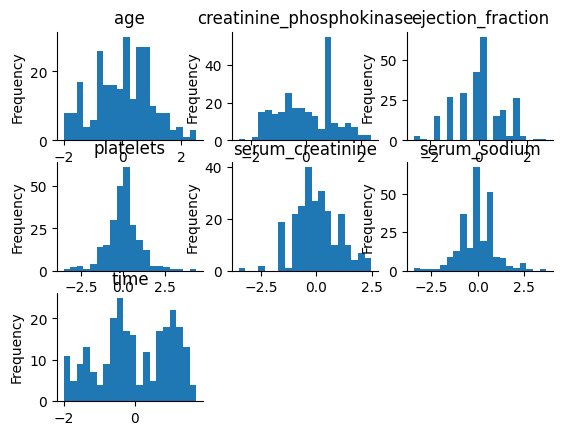

In [ ]:

def plotting(data_frame , col_list , row_num , col_num):
  for i , col in enumerate(col_list):
    plt_num = i + 1
    plt.subplot(row_num , col_num , plt_num)
    data_frame[col].plot(kind='hist', bins=20, title= col)
    plt.gca().spines[['top', 'right',]].set_visible(False)



plotting(df_normalized, col_norm , 3 , 3 )

In [ ]:
df_normalized.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,-0.352450,0,2.374674,0,0.070512,0,0.132928,-0.026987,-0.236778,1,0,-2.006151,1
1,0.519501,0,-0.537122,0,-1.782976,0,-1.105792,0.414407,-1.661460,1,1,-1.970584,1
2,-0.848176,1,-0.827955,0,-1.782976,0,-0.489525,1.177292,0.011118,1,0,-1.970584,1
3,0.519501,1,-0.443213,1,-1.782976,0,0.813072,1.663714,-3.237005,0,0,-1.936797,1
4,1.269548,1,-0.022833,0,-2.495302,0,-1.602335,0.212272,0.011118,1,0,-1.873449,1


In [ ]:
Train_dataset , Valid_dataset =train_test_split(df_normalized , train_size= .8, random_state= 23 , shuffle = True)

x_train = Train_dataset.iloc[:, :-1]
y_train = Train_dataset.iloc[:, -1:]
x_valid = Valid_dataset.iloc[:,:-1]
y_valid = Valid_dataset.iloc[:,-1:]

# DataLoader


In [ ]:
x_train = torch.FloatTensor(np.array(x_train))
y_train = torch.FloatTensor(np.array(y_train))
x_valid = torch.FloatTensor(np.array(x_valid))
y_valid = torch.FloatTensor(np.array(y_valid))

In [ ]:
train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

در زمان ولید و تست خوبه که شافل را فالس کنید.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size= 4, shuffle= True)
valid_loader = DataLoader(valid_dataset, batch_size= 4, shuffle= True)

# Defining Model


In [ ]:
num_feats = 12
out_feat = 1
h1 = 128
h2 = 240
h3 = 64
h4 = 32
h5 = 8


model = nn.Sequential(nn.Linear(num_feats, h1),
                      nn.ReLU(),
                      nn.Linear(h1, h2),
                      nn.ReLU(),
                      nn.Linear(h2, h3),
                      nn.ReLU(),
                      nn.Linear(h3, h4),
                      nn.ReLU(),
                      nn.Linear(h4, h5),
                      nn.ReLU(),
                      nn.Linear(h5, out_feat),
                      nn.Softmax(dim=0))

اگر دارید از  bceloss استفاده می کنید پس لایه اخر رو سیگوید بزنین چون دو کلاسه هستید.

# Loss and Optimizer

لرنینگک ریتتون خیلی بزرگه. کوچکترش کنید:

۰.۰۰۱

In [ ]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=.01)

#Utils

In [ ]:
class AverageMeter(object):
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count

#Device

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

#Loop Train


به تریتب مراحل در کد زیر دقت کنید:


In [ ]:
start = time.time()

  loss_train = AverageMeter()
  acc_train = Accuracy(task = 'binary').to(device)
  for i, (inputs, targets) in enumerate(train_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs.squeeze(), targets)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item())
      acc_train(outputs.squeeze(), targets.int())

  time_elapsed = time.time() - start
  total_time += time_elapsed

In [ ]:
num_epoch = 500

loss_train_hist = []
loss_valid_hist = []
acc_train_hist = []
acc_valid_hist = []


since = time.time()
for epoch in range(num_epoch):
  loss_train = AverageMeter()
  acc_train = BinaryAccuracy().to(device)
  for i , (inputs , targets) in enumerate(train_loader):
    targets = targets.to(device)
    inputs = inputs.to(device)
    outputs = model(inputs)
    loss = loss_fn(outputs.squeeze(), targets.squeeze())
    loss_train.update(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    acc_train(outputs , targets)




  with torch.no_grad():
    loss_valid = AverageMeter()
    acc_valid = BinaryAccuracy().to(device)
    for i , (inputs , targets) in enumerate(valid_loader):
      targets = targets.to(device)
      inputs = inputs.to(device)
      outputs = model(inputs)
      loss = loss_fn(outputs.squeeze(), targets.squeeze())
      loss_valid.update(loss.item())
      acc_valid(outputs , targets)




  loss_train_hist.append(loss_train.avg)
  loss_valid_hist.append(loss_valid.avg)

  acc_train_hist.append(acc_train.compute())
  acc_valid_hist.append(acc_valid.compute())

  if epoch == 0:
    best_acc = acc_valid.compute()

  if acc_valid.compute() > best_acc:
    torch.save(model, 'best_model.pth')

  if epoch%10 == 0 or epoch == num_epoch-1:
    print(f"loss train in epoch: {epoch}  is {loss_train.avg}")
    print(f"loss valid in epoch: {epoch}  is {loss_valid.avg}")
    print(f"acc train in epoch: {epoch}  is {acc_train.compute()}")
    print(f"acc valid in epoch: {epoch}  is {acc_valid.compute()} \n")



time_elapsed = time.time() - since

loss train in epoch: 0  is 0.6628968465328217
loss valid in epoch: 0  is 0.530232479939094
acc train in epoch: 0  is 0.6582914590835571
acc valid in epoch: 0  is 0.7799999713897705 

loss train in epoch: 10  is 0.6618248462677002
loss valid in epoch: 10  is 0.5089302957057953
acc train in epoch: 10  is 0.6582914590835571
acc valid in epoch: 10  is 0.8199999928474426 

loss train in epoch: 20  is 0.6625046354532241
loss valid in epoch: 20  is 0.5299986875974215
acc train in epoch: 20  is 0.6582914590835571
acc valid in epoch: 20  is 0.7799999713897705 

loss train in epoch: 30  is 0.6614610964059829
loss valid in epoch: 30  is 0.5084741596992199
acc train in epoch: 30  is 0.6582914590835571
acc valid in epoch: 30  is 0.8199999928474426 

loss train in epoch: 40  is 0.6629457449913025
loss valid in epoch: 40  is 0.5294476518264184
acc train in epoch: 40  is 0.6582914590835571
acc valid in epoch: 40  is 0.7799999713897705 

loss train in epoch: 50  is 0.6614535504579544
loss valid in epoc

#Model first layer bias

In [ ]:
first_layer_bias = dict(model.named_parameters()).get('0.bias')
first_layer_bias

Parameter containing:
tensor([ 0.0372, -0.0996, -0.1255, -0.1098, -0.1163,  0.2797,  0.1574,  0.2999,
         0.0752,  0.0719,  0.1068,  0.1184, -0.2084, -0.1438, -0.0313,  0.0207,
         0.1071,  0.1133,  0.2416,  0.0590, -0.0819, -0.2202, -0.1000, -0.1766,
         0.0972,  0.1232,  0.1871, -0.0764, -0.0224, -0.0722,  0.0790,  0.1350,
        -0.0223,  0.0597,  0.0388,  0.1204, -0.0618, -0.1760,  0.0924, -0.0853,
        -0.0671,  0.1308, -0.0153, -0.0071, -0.1406,  0.0025, -0.2734,  0.0803,
         0.0090,  0.2068,  0.0440,  0.0088,  0.1140,  0.2090, -0.1373,  0.1807,
         0.0834, -0.1838,  0.1081, -0.1474, -0.0964, -0.1768, -0.2086,  0.2207,
        -0.2252,  0.1609, -0.2806, -0.0374,  0.0798,  0.1636, -0.0931,  0.0639,
         0.0591,  0.1540, -0.0034,  0.1192, -0.1546, -0.2036,  0.2283, -0.2080,
        -0.0459, -0.0523,  0.2709, -0.0207, -0.2206, -0.0872,  0.1604,  0.1132,
         0.2625, -0.0362,  0.1040, -0.2719,  0.1433,  0.1744,  0.1941, -0.1156,
        -0.0865,  

#Save Model


In [ ]:
torch.save(model, '/content/drive/MyDrive/Model/model_homework3.pth')

#Plot Learning Curve And Accuracy

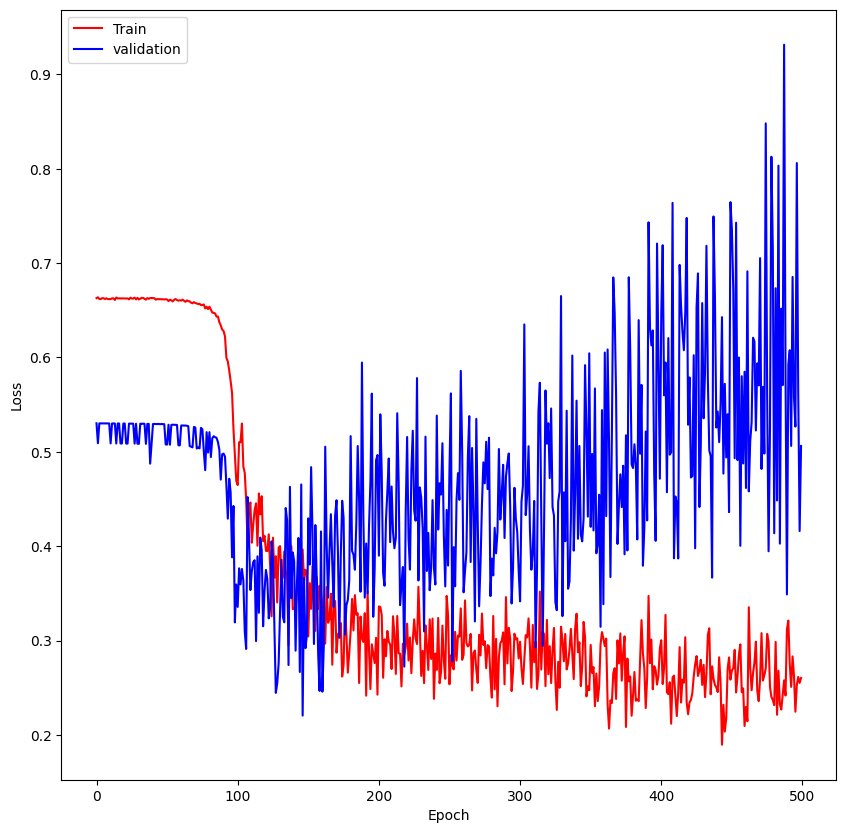

In [ ]:
fig , ax = plt.subplots(figsize=(10 , 10))

ax.plot(range(num_epoch), loss_train_hist , 'r-', label="Train")
ax.plot(range(num_epoch), loss_valid_hist , 'b-', label="validation")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

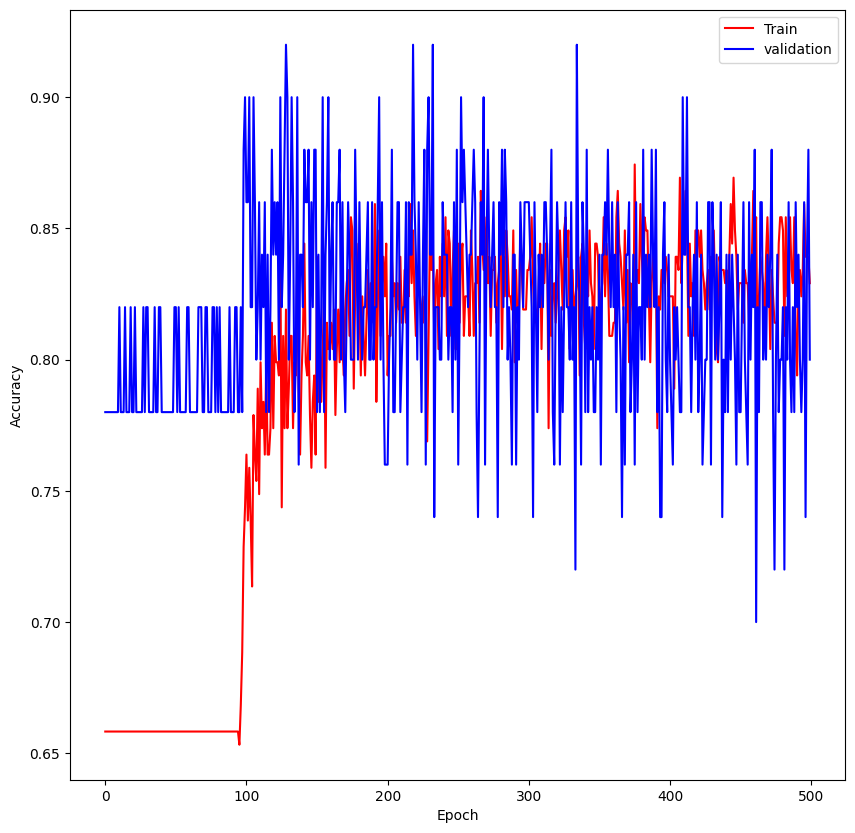

In [ ]:
fig , ax = plt.subplots(figsize=(10 , 10))

ax.plot(range(num_epoch), acc_train_hist , 'r-', label="Train")
ax.plot(range(num_epoch), acc_valid_hist , 'b-', label="validation")

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

#Load Best Model

In [ ]:
best_model = torch.load('best_model.pth')